In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import math
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import scipy.linalg as linalg

In [172]:
dados = pd.read_csv('dados.csv',sep=';')

,population,population_density
location,,
Brazil,212559409.0,25.040
France,65273512.0,122.578
Italy,60461828.0,205.859
South Africa,59308690.0,46.754
South Korea,51269183.0,527.967


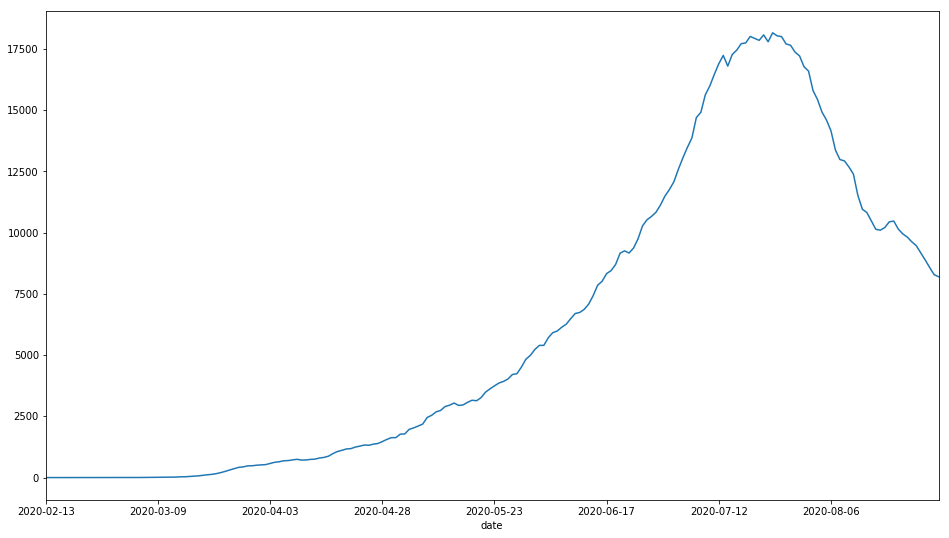

In [35]:
mundo = pd.read_csv('mundo.csv',sep=',')
italia = mundo[mundo['location']=='Africa']
italia = italia.set_index('date')

mItalia = italia['new_cases'].rolling(7).mean()
mItalia[:6] = italia['new_cases'].values[:6]
fig = plt.figure(figsize=(16,9))
mItalia[:200].plot()
countries = ['France','Italy','Brazil','South Korea','South Africa']
mundo[mundo['location'].isin(countries)][['location','population','population_density']].groupby('location').max()

In [60]:
dados.head(35)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125.0,2,0,0,0,NaN,NaN,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125.0,2,0,0,0,NaN,NaN,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125.0,2,0,0,0,NaN,NaN,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125.0,3,1,0,0,NaN,NaN,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125.0,7,4,0,0,NaN,NaN,NaN


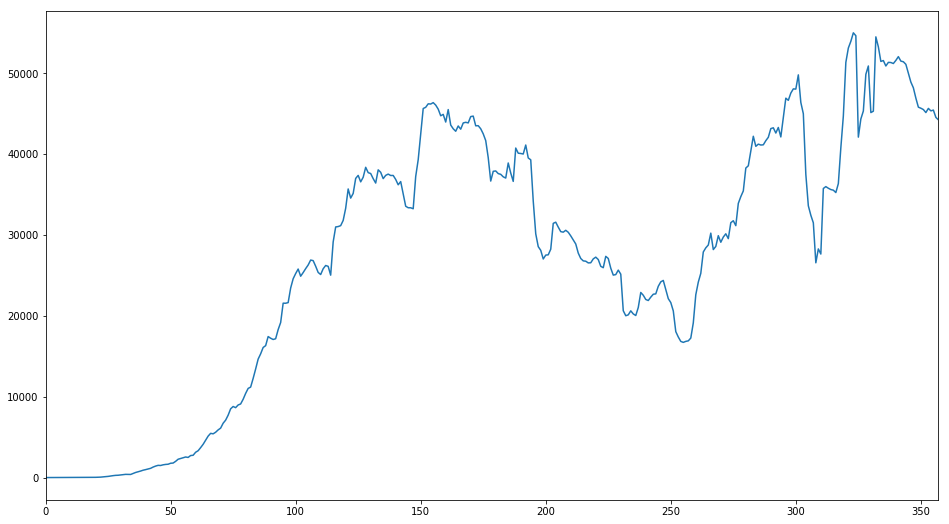

In [173]:
brasil = dados[dados['regiao'] == 'Brasil']
media = brasil['casosNovos'].rolling(7).mean()
media[:6] = brasil['casosNovos'].values[:6]
fig = plt.figure(figsize=(16,9))
media.plot()

In [174]:
dataX = dados['data']
x = ar(range(len(media)))
y = ar(media.values)

1483.2351648351648 1740.7630392521057 6118.428571428572
[9.32298317e+04 1.56667944e+02 3.99380477e+01]


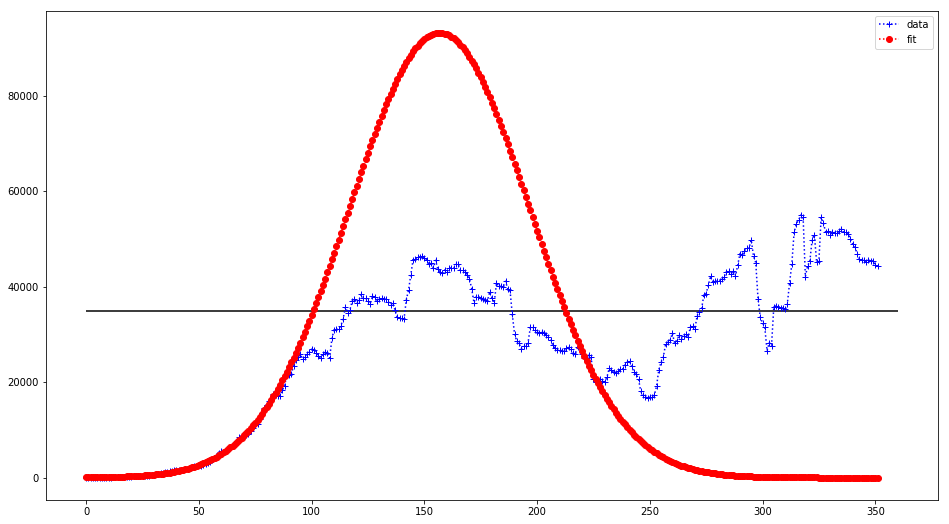

In [119]:
treinoX = x[:65]
treinoY = y[:65]


n = len(treinoX)
mean = treinoY.mean()
sigma = treinoY.std()

print(mean, sigma,max(treinoY))

def gauss(x, A, x0, sigma):
    #print(H,A,x0,sigma)
    return  A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def linear(x, a, b):
    return  a *x + b

def exponencial(x, a, b, c, d):
    return  a*np.cos(b*x)+c + d * x

tau = 0.045
def fourier(x, *a):
    ret = a[0] * np.cos(np.pi / tau * x)
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos((deg+1) * np.pi / tau * x)
    return ret


#popt,pcov = curve_fit(fourier,treinoX,treinoY, [1.0] * 50)
popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10])

print(popt)

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,gauss(x,*popt),'ro:',label='fit')
plt.legend()

plt.show()

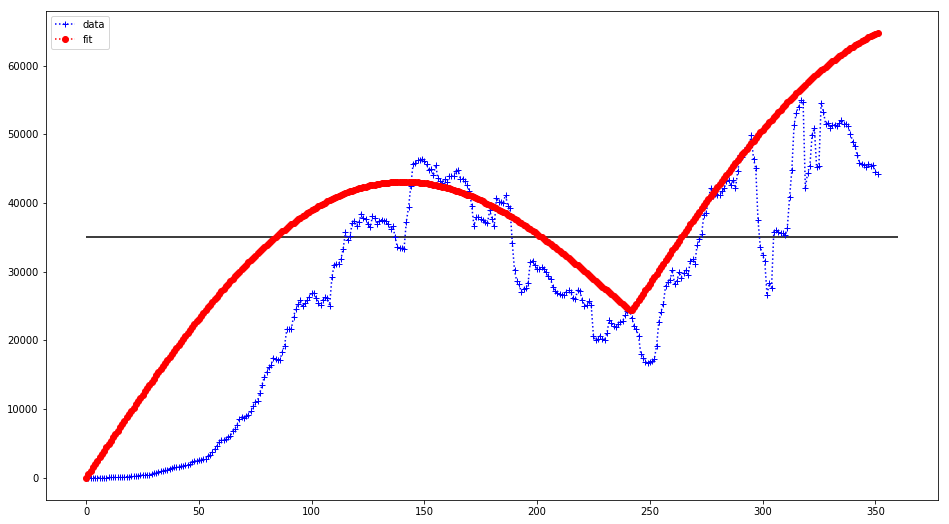

In [46]:
a = 30000 
b = 0.013
c = 0
d = 100
def funcao(x):
    return  a*np.abs(np.sin(b*x))+c + d*x

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()

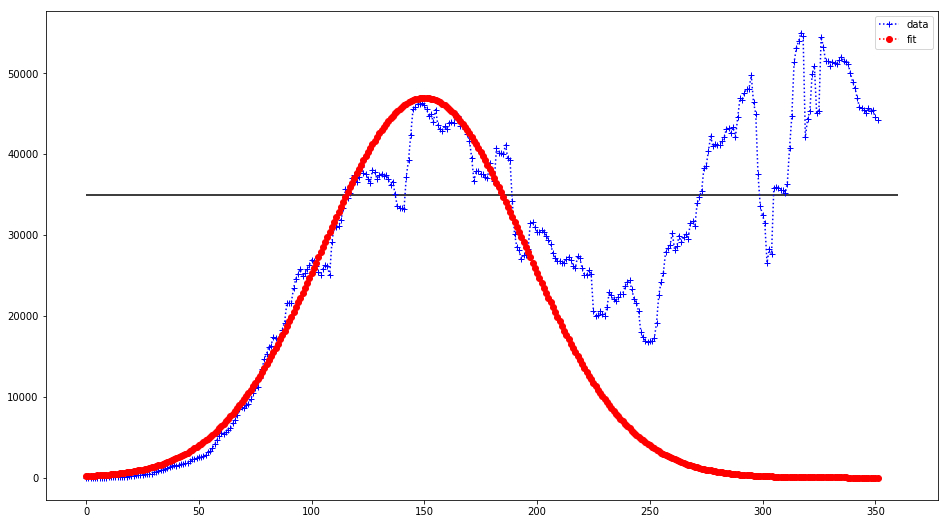

In [111]:
a = 47000 
b = 150
c = 45

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()


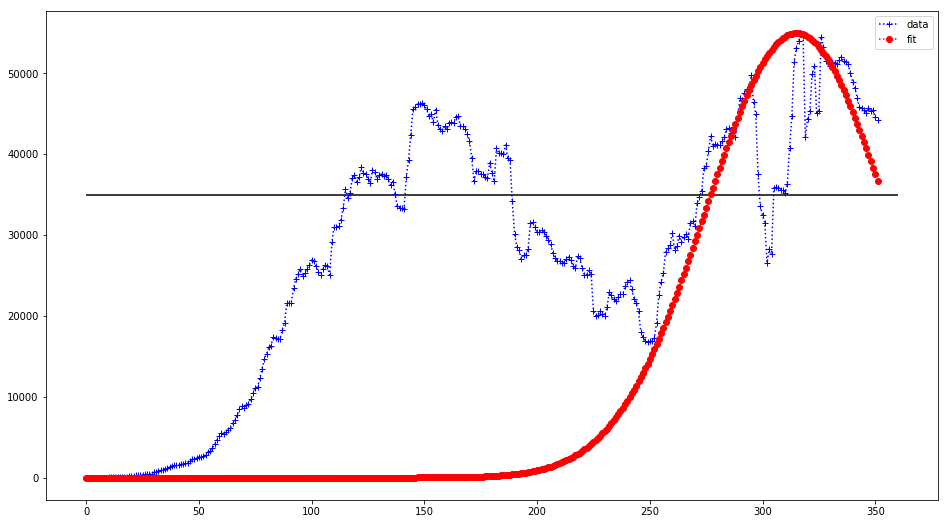

In [76]:
a = 55000 
b = 315
c = 40

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()


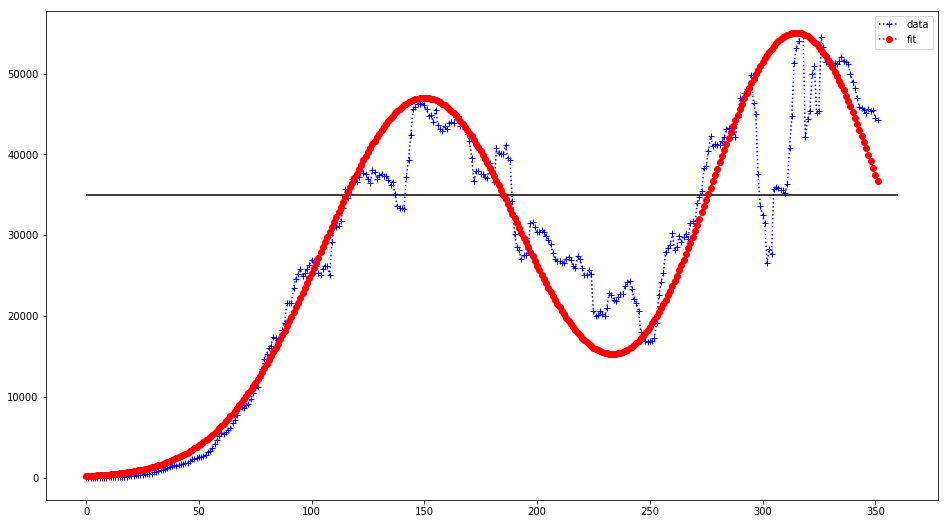

In [112]:
a = 55000 
b = 315
c = 40

a1 = 47000 
b1 = 150
c1 = 45

def funcao(x):
    return  a1 * np.exp(-(x - b1) ** 2 / (2 * c1 ** 2)) + a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()


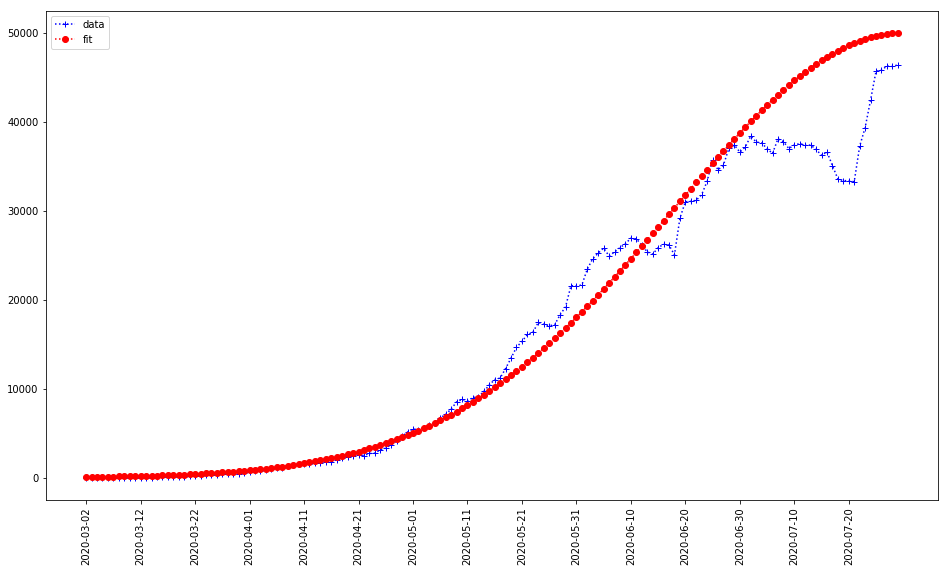

In [201]:
fim = 150
eixoX = dataX[:fim]
treinoX = x[:fim]
treinoY = y[:fim]

a = 50000 
b = 150
c = 42

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

idx = range(0,fim,10)


fig = plt.figure(figsize=(16,9))
plt.plot(eixoX,treinoY,'b+:',label='data')
plt.plot(eixoX,funcao(treinoX),'ro:',label='fit')
plt.xticks(eixoX[idx], eixoX[idx], rotation='vertical')

plt.legend()

plt.show()


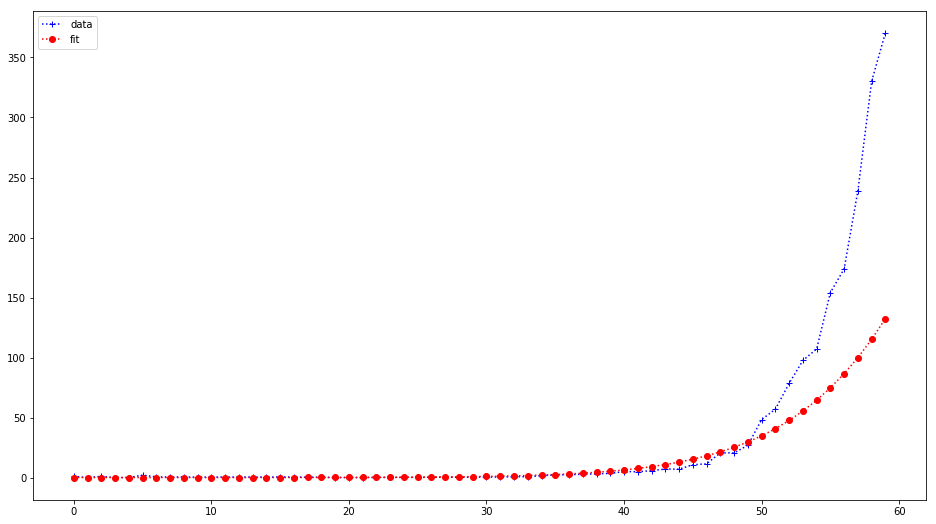

In [126]:
dados = mundo[mundo['location']=='Canada']

media = dados['new_cases'].rolling(7).mean()
media[:6] = dados['new_cases'].values[:6]
dataX = dados['date']
x = ar(range(len(media)))
y = ar(media.values)

fim=46
treinoX = x[:fim]
treinoY = y[:fim]

plotX = x[:60]
plotY = y[:60]

a = 9000
b = 120
c = 21

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

#popt,pcov = curve_fit(gauss,treinoX,treinoY,[a, b, c],maxfev = 9000)
#print(popt)
fig = plt.figure(figsize=(16,9))
plt.plot(plotX,plotY,'b+:',label='data')
plt.plot(plotX,funcao(plotX),'ro:',label='fit')
#plt.plot(plotX,gauss(plotX,*popt),'go:',label='fit')
plt.legend()

plt.show()


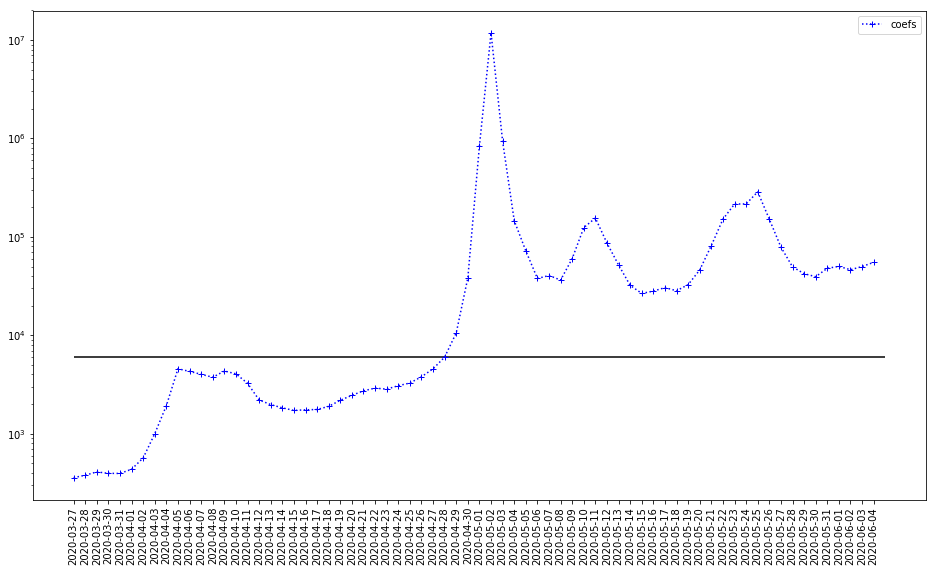

In [180]:
inicio = 30
fim=100

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

coefs = []
difs = []

for f in range(inicio,fim):
    treinoX = x[:f]
    treinoY = y[:f]
    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10], maxfev=5000)
    coefs.append(popt[0])
    #print(f,popt)
    if(len(difs) > 0):
        difs.append(abs(popt[0]-coefs[-2]))
    else:
        difs.append(popt[0])
#print(coefs)
fig = plt.figure(figsize=(16,9))
plt.plot(dataX[inicio:fim],coefs,'b+:',label='coefs')
plt.yscale('log')
idx = range(inicio,fim,10)
plt.xticks(dataX[inicio:fim], dataX[inicio:fim], rotation='vertical')
plt.hlines(6000,0,fim-inicio)
plt.legend()

plt.show()

[143.96893544]


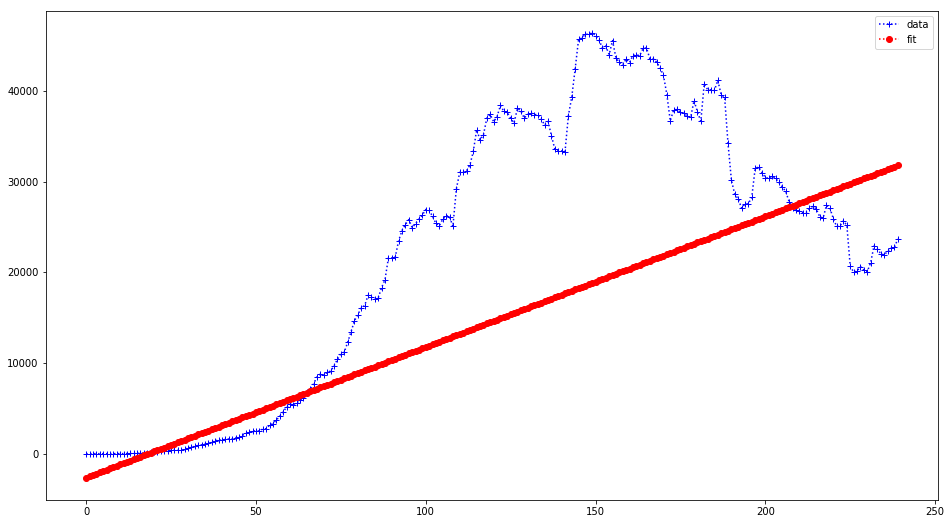

In [36]:
fim=80
treinoX = x[:fim].reshape((-1, 1))
treinoY = y[:fim]

plotX = x[:240]
plotY = y[:240]

model = LinearRegression()
model.fit(treinoX, treinoY)
print(model.coef_)
y_pred = model.predict(plotX.reshape((-1, 1)))
fig = plt.figure(figsize=(16,9))
plt.plot(plotX,plotY,'b+:',label='data')
plt.plot(plotX,y_pred,'ro:',label='fit')
plt.legend()

plt.show()


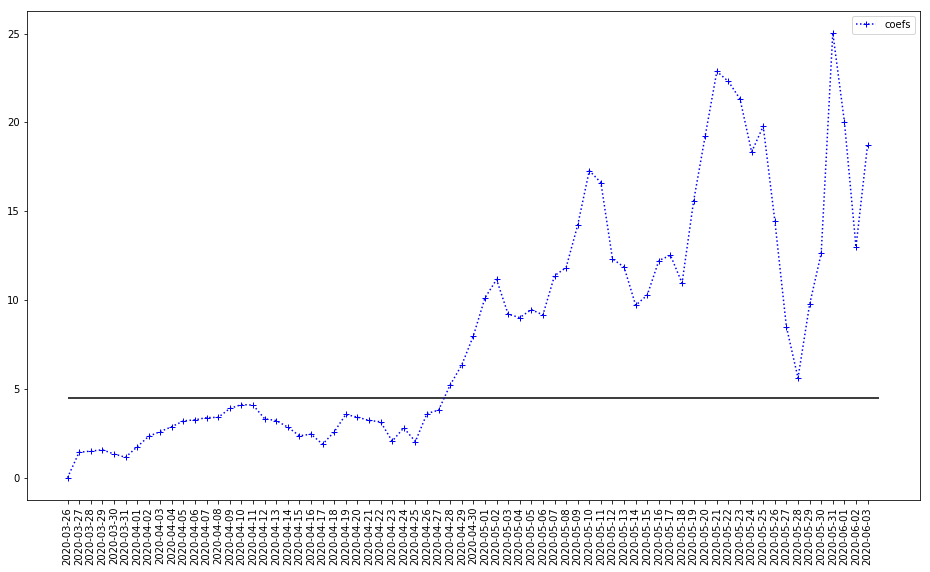

In [130]:
inicio = 30
fim=100

coefs = []
difs = []

for f in range(inicio,fim):
    treinoX = x[f-30:f].reshape(-1,1)
    treinoY = y[f-30:f]
    model = LinearRegression()
    model.fit(treinoX, treinoY)
    coefs.append(model.coef_[0])
    if(len(difs) > 0):
        difs.append(abs(model.coef_[0]-coefs[-2]))
    else:
        difs.append(0)

fig = plt.figure(figsize=(16,9))
plt.plot(dataX[inicio:fim],difs,'b+:',label='coefs')
#plt.yscale('log')
idx = range(inicio,fim,10)
plt.xticks(dataX[inicio:fim], dataX[inicio:fim], rotation='vertical')
plt.hlines(4.5,0,fim-inicio)
plt.legend()

plt.show()

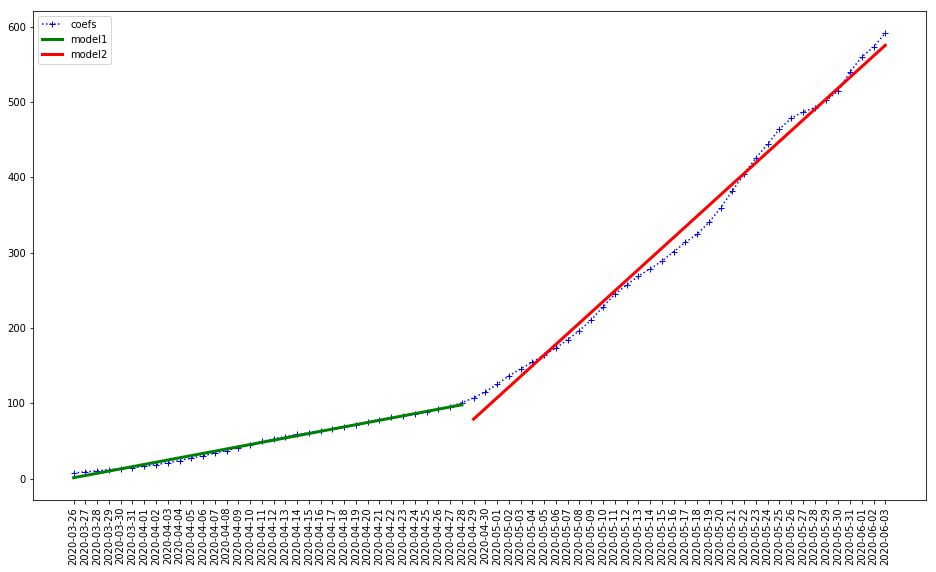

In [132]:
inicio = 30
fim=100

regre = 34

coefs = []

for f in range(inicio,fim):
    treinoX = x[f-30:f].reshape(-1,1)
    treinoY = y[f-30:f]
    model = LinearRegression()
    model.fit(treinoX, treinoY)
    coefs.append(model.coef_[0])

model1 = LinearRegression()
model1.fit(x[:regre].reshape(-1,1), coefs[:regre])
y_pred1 = model1.predict(x[:regre].reshape(-1, 1))


model2 = LinearRegression()
model2.fit(x[regre:len(coefs)].reshape(-1,1), coefs[regre:])
y_pred2 = model2.predict(x[regre:len(coefs)].reshape(-1, 1))

fig = plt.figure(figsize=(16,9))
plt.plot(dataX[inicio:fim],coefs,'b+:',label='coefs')

plt.plot(dataX[inicio:inicio+regre],y_pred1,color='green',label='model1',linewidth=3)
plt.plot(dataX[inicio+regre:inicio+regre+len(coefs[regre:])],y_pred2,color='red',label='model2',linewidth=3)

idx = range(inicio,fim,10)
plt.xticks(dataX[inicio:fim], dataX[inicio:fim], rotation='vertical')

#plt.hlines(4.5,0,fim-inicio)
plt.legend()

plt.show()

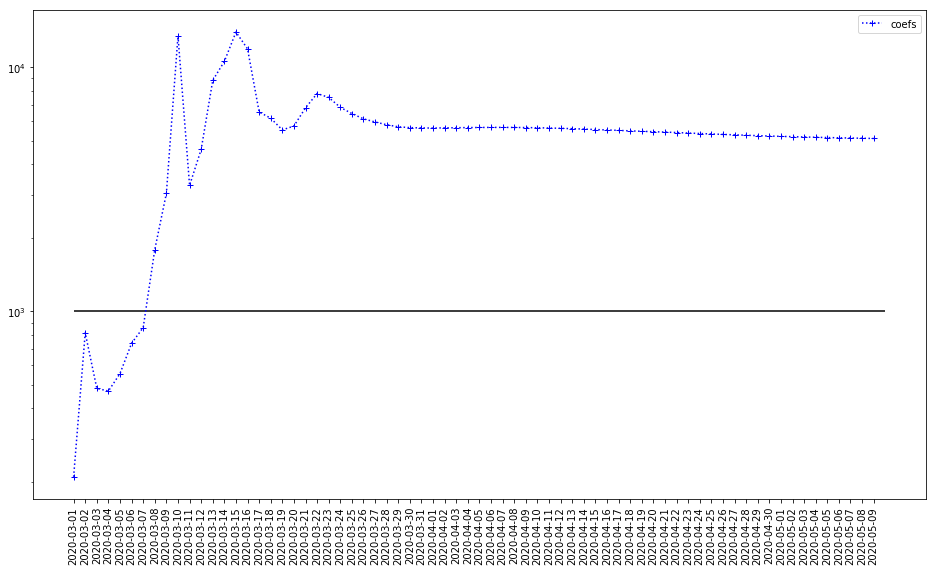

In [163]:
inicio = 30
fim=100

dataItaliaX = italia['date']
xItalia = ar(range(len(mItalia)))
yItalia = ar(mItalia.values)

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

coefs = []
difs = []

for f in range(inicio,fim):
    treinoX = xItalia[:f]
    treinoY = yItalia[:f]
    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10])
    coefs.append(popt[0])
    #print(f,popt)
    if(len(difs) > 0):
        difs.append(abs(popt[0]-coefs[-2]))
    else:
        difs.append(popt[0])
#print(coefs)
fig = plt.figure(figsize=(16,9))
plt.plot(dataItaliaX[inicio:fim],coefs,'b+:',label='coefs')
plt.yscale('log')
idx = range(inicio,fim,10)
plt.xticks(dataItaliaX[inicio:fim], dataItaliaX[inicio:fim], rotation='vertical')
plt.hlines(1000,0,fim-inicio)
plt.legend()

plt.show()

In [2]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
#paises = paises[-53:]
#paises = ['United States']
#G20
#paises = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'South Korea', 'European Union']
inicio = 1
fim=150
#paises = ['Brazil']

diretorio = 'calculados/'

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

dias = 200
limite = 40
for pais in paises:
    vertical = None
    dados = mundo[mundo['location']==pais]
    densidade = dados['population_density'].values[0]
    if(densidade <= 0):
        densidade = 25
    print(pais, densidade, limite*densidade)
    
    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    dataX = dados['date']
    x = ar(range(len(media)))
    y = ar(media.values)
    

    coefs = []
    difs = []

    datas = []
    final = fim
    if(len(y) < final):
        final = len(y)
    for f in range(inicio,final):
        if((y[f] > 2*densidade and y[f-1] > 2*densidade) or f >= 30):
            treinoX = x[:f]
            treinoY = y[:f]
            #print(treinoY)
            #print(dataX.values[f],f)
            if(treinoY.max() > 3):
                try:
                    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 100], maxfev=5000)
                except:
                    try:
                        popt,pcov = curve_fit(gauss,treinoX,treinoY,[10, 1, 1], maxfev=5000)
                    except:
                        #print('ERRO2',f)
                        continue
            else:
                continue
            #print(popt[0],f)
            datas.append(dataX.values[f])
            coefs.append(popt[0])
            if(vertical == None and popt[0] >= densidade*limite and len(coefs) > 3 and f >= 14):
                vertical = dataX.values[f]
            #print(f,len(coefs),len(datas))
            if(len(difs) > 0):
                difs.append(abs(popt[0]-coefs[-2]))
            else:
                difs.append(popt[0])
    if(vertical != None):
        #print(len(coefs),len(datas))
        datas = ar(datas)
        fig = plt.figure(figsize=(16,9))
        plt.plot(datas,coefs,'b+:',label='Pico Gaussiana')
        plt.yscale('log')
        plt.title(pais)
        idx = list(range(0,len(datas),2))
        #print(idx)
        plt.xticks(datas[idx], datas[idx], rotation='vertical')
        plt.hlines(limite*densidade,0,len(coefs))
        plt.legend()

        try:
            plt.savefig(diretorio+pais+'_gaussian.png')
        except:
            print('ERRO:',pais)
            pass
        fig.clf()
        plt.close()
    
    
        dados = mundo[mundo['location']==pais]
        media = dados['new_cases'].rolling(7).mean()
        media[:6] = dados['new_cases'].values[:6]
        dataX = dados['date'].reset_index(drop=True)
        y = media.values
        fig = plt.figure(figsize=(16,9))
        plt.plot(dataX[:dias],y[:dias],label='Novos Casos')

        plt.vlines(vertical,media[:dias].min(),media[:dias].max())
        plt.title(pais)
        idx = list(range(0,len(dataX[:dias]),10))

        plt.xticks(dataX[idx], dataX[idx], rotation='vertical')
        plt.legend()

        try:
            plt.savefig(diretorio+pais+'_curva.png')
        except:
            print('ERRO:',pais)
            pass

        fig.clf()
        plt.close()
    
    
print('FIM')

Afghanistan 54.422 2176.88


/home/raphael/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Africa 25 1000
Albania 104.87100000000001 4194.84
Algeria 17.348 693.92
Andorra 163.755 6550.2
Angola 23.89 955.6
Anguilla 25 1000
Antigua and Barbuda 231.845 9273.8
Argentina 16.177 647.0799999999999
Armenia 102.931 4117.24
Asia 25 1000
Australia 3.202 128.07999999999998
Austria 106.749 4269.96
Azerbaijan 119.309 4772.36
Bahamas 39.497 1579.88
Bahrain 1935.9070000000002 77436.28
Bangladesh 1265.036 50601.44
Barbados 664.4630000000001 26578.520000000004
Belarus 46.858000000000004 1874.3200000000002
Belgium 375.564 15022.560000000001
Belize 16.426 657.04
Benin 99.11 3964.4
Bermuda 1308.82 52352.799999999996
Bhutan 21.188000000000002 847.5200000000001
Bolivia 10.202 408.08
Bosnia and Herzegovina 68.49600000000001 2739.84
Botswana 4.044 161.76
Brazil 25.04 1001.5999999999999
Brunei 81.347 3253.8799999999997
Bulgaria 65.18 2607.2000000000003
Burkina Faso 70.15100000000001 2806.0400000000004
Burundi 423.06199999999995 16922.48
Cambodia 90.67200000000001 3626.8800000000006
Cameroon 50.885 20

In [44]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
paises = paises[30:]
#paises = ['United States']
#G20
paises = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'South Korea', 'European Union']
inicio = 30
fim=150

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))


for pais in paises:
    print(pais)
    
    dados = mundo[mundo['location']==pais]

    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    dataX = dados['date']
    x = ar(range(len(media)))
    y = ar(media.values)
    

    coefs = []
    difs = []
    datas = []
    for f in range(inicio,fim):
        try:
            treinoX = x[f-30:f]
            treinoY = y[f-30:f]
            model = LinearRegression()
            model.fit(treinoX.reshape(-1, 1), treinoY)
            datas.append(dataX.values[f])
            coefs.append(model.coef_[0])
            if(len(difs) > 1):
                difs.append(abs(model.coef_[0]-coefs[-2]))
                #difs.append((model.coef_[0]-coefs[-2])/coefs[-2]*100)
            else:
                difs.append(0)
        except:
            #print('ERRO2')
            pass
    #print(len(coefs),len(datas))
    datas = ar(datas)
    fig = plt.figure(figsize=(16,9))
    plt.plot(datas,difs,'b+:',label='Dif. dos Coeficientes Angulares')
    plt.title(pais)
    idx = list(range(0,len(datas),10))
    #print(idx)
    plt.xticks(datas[idx], datas[idx], rotation='vertical')
    #plt.hlines(1000,0,fim-inicio)
    plt.legend()

    try:
        plt.savefig('g20/'+pais+'_linear.png')
    except:
        print('ERRO:',pais)
        pass
    
    fig.clf()
    plt.close()
print('FIM')    

Argentina
Australia
Brazil
Canada
China
France
Germany
India
Indonesia
Italy
Japan
Mexico
Russia
Saudi Arabia
South Africa
Turkey
United Kingdom
United States
South Korea
European Union
FIM


In [4]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
#paises = paises[-53:]
#paises = ['United States']
#G20
#paises = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'South Korea', 'European Union']
inicio = 1
fim=150
#paises = ['Canada']

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

dias = 200
limite = 40
significancia = 0.005
significante = 0
naoSignificante = 0
fora = 0
for pais in paises:
    #print(pais)
    vertical = None
    dados = mundo[mundo['location']==pais]
    densidade = dados['population_density'].values[0]
    if(densidade <= 0):
        densidade = 25

    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    x = ar(range(len(media)))
    y = ar(media.values)
    

    coefs = []
    final = fim
    if(len(y) < final):
        final = len(y)
    entro = False
    primeiro = False
    for f in range(inicio,final):
        if((y[f] > 2*densidade and y[f-1] > 2*densidade) or f >= 30):
            primeiro = True
            treinoX = x[:f]
            treinoY = y[:f]
            if(treinoY.max() > 3):
                try:
                    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 100], maxfev=5000)
                except:
                    try:
                        popt,pcov = curve_fit(gauss,treinoX,treinoY,[10, 1, 1], maxfev=5000)
                    except:
                        #print('ERRO2',f)
                        continue
            else:
                continue
            #print(popt[0],f)
            coefs.append(popt[0])
            
            if(vertical == None and popt[0] >= limite*densidade and len(coefs) > 3 and f >= 14):
                entro = True
                antes = y[f-14:f]
                depois = y[f:f+14]
                #print(antes)
                #print(depois)

                df = pd.DataFrame()
                g1 = np.full(len(antes),1)

                g2 = np.full(len(depois),2)
                d1 = list(zip(g1,antes))
                d2 = list(zip(g2, depois))
                #print(d1)
                df = df.append(d1)
                df = df.append(d2)
                df.reset_index(drop=True, inplace=True)

                df.columns = ['Grupo', 'Casos']
                #print(df)

                results = smf.ols('Casos ~ C(Grupo)', data=df).fit()
                #table = sm.stats.anova_lm(results, typ=2)
                #print(dir(results))
                #print(results.pvalues[1])
                print(pais,results.pvalues[1])
                #print(df)
                if(results.pvalues[1] <= significancia):
                    significante = significante + 1
                else:
                    naoSignificante = naoSignificante + 1
                #print(table)
                #df.boxplot(column=['Casos'],by='Grupo')
                break
    if(not entro and len(coefs) > 0):
        print(pais,'fora')
        fora = fora + 1
    #break
    
    
print('FIM', significante, naoSignificante, fora, significante+naoSignificante, significante+naoSignificante+fora, len(paises)-significante-naoSignificante-fora, len(paises))

/home/raphael/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Afghanistan 3.4467764438101263e-10
Africa 6.593652577808076e-10
Albania 5.869709006343797e-07
Algeria 5.181167722702819e-06
Andorra fora
Angola 0.0001557813624260258
Antigua and Barbuda 0.0007516421120277423
Argentina 7.725660463092637e-09
Armenia 2.7061698891566688e-08
Asia 1.2384507307578361e-09
Australia 6.646083749602794e-05
Austria fora
Azerbaijan 1.4463192508568895e-05
Bahamas fora
Bahrain 8.194455522433007e-05
Bangladesh fora
Barbados fora
Belarus 8.285897956459051e-12
Belgium 1.1583874822269552e-06
Belize fora
Benin 2.3099599147610657e-10
Bolivia 1.2925555800900236e-07
Bosnia and Herzegovina 3.925454948169911e-09
Botswana 0.28999723824619755
Brazil 7.24878343073568e-11
Brunei fora
Bulgaria 5.310359070408066e-05
Burkina Faso fora
Burundi 0.526690736482871
Cambodia fora
Cameroon 6.387934202427651e-07
Canada 0.000505858707614583
Cape Verde 2.021047647265454e-05
Central African Republic 4.01251998509658e-07
Chad fora
Chile 1.1303409175848528e-08
China 1.2131635873850863e-09
Colombi

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/raphael/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/raphael/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/raphael/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Grenada nan
Guatemala 1.1225406668639962e-09
Guinea fora
Guinea-Bissau fora
Guyana 0.00011056736436210619
Haiti 0.0014819075723233866
Honduras 0.011509380624530646
Hungary fora
Iceland 2.8050534028008257e-08
India 2.0872626007223607e-05
Indonesia 1.848457560546312e-05
International fora
Iran 1.8752947905269558e-08
Iraq 1.3917808661651145e-05
Ireland 1.764586180709739e-05
Israel 2.7813452467245294e-11
Italy 1.2702530587267272e-07
Jamaica fora
Japan 1.548807526478338e-08
Jordan 0.09711711638074558
Kazakhstan 3.975581505590302e-09
Kenya 2.905430778103939e-07
Kosovo fora
Kuwait 1.5123550568525951e-06
Kyrgyzstan 0.38157864482484805
Latvia fora
Lebanon 0.2850499129854625
Lesotho fora
Liberia 0.047084651250427115
Libya 8.625899708369656e-10
Liechtenstein fora
Lithuania fora
Luxembourg fora
Madagascar 0.00013946662486873408
Malawi 0.01470760285593435
Malaysia fora
Maldives 1.5657296883538816e-05
Mali fora
Malta fora
Mauritania 1.8267141560344822e-08
Mauritius fora
Mexico 4.6170039998398453e-10

In [42]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
#paises = paises[-53:]
#paises = ['United States']
#G20
#paises = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'South Korea', 'European Union']
inicio = 1
fim=150
#paises = ['Brazil']

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))


def teste_chow(y1,y2):
    x1 = ar(list(range(len(y1))))
    x2 = ar(list(range(len(y2))))
    x3 = ar(list(range(len(y1)+len(y2))))
    y3 = np.append(y1,y2)
    #print(y3)
    
    #M1 = x1[:, np.newaxis]**[0, 1]
    #p, res, rnk, s = linalg.lstsq(M1, y1)
    
    x1 = sm.add_constant(x1)
    x2 = sm.add_constant(x2)
    x3 = sm.add_constant(x3)
    
    model1 = sm.OLS(y1,x1).fit()
    model2 = sm.OLS(y2,x2).fit()
    model3 = sm.OLS(y3,x3).fit()
    
    RSSgeral = model3.ssr
    RSSantes = model1.ssr
    RSSdepois = model2.ssr
    
    N1 = len(x1)
    N2 = len(x2)
    chow = ((RSSgeral-(RSSantes+RSSdepois))/2.0)/((RSSantes+RSSdepois)/(N1+N2-4.0))
    
    df1 = 2.0
    df2 = len(x1) + len(x2) - 4.0
    #p_val = stats.f.sf(chow, df1, df2)

    p_val = 1 - stats.f.cdf(chow, df1, df2)
    return p_val

dias = 200
limite = 40
significancia = 0.05
significante = 0
naoSignificante = 0
fora = 0
for pais in paises:
    #print(pais)
    vertical = None
    dados = mundo[mundo['location']==pais]
    densidade = dados['population_density'].values[0]
    if(densidade <= 0):
        densidade = 25

    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    x = ar(range(len(media)))
    y = ar(media.values)
    

    coefs = []
    final = fim
    if(len(y) < final):
        final = len(y)
    entro = False
    primeiro = False
    for f in range(inicio,final):
        if((y[f] > 2*densidade and y[f-1] > 2*densidade) or f >= 30):
            primeiro = True
            treinoX = x[:f]
            treinoY = y[:f]
            if(treinoY.max() > 3):
                try:
                    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 100], maxfev=5000)
                except:
                    try:
                        popt,pcov = curve_fit(gauss,treinoX,treinoY,[10, 1, 1], maxfev=5000)
                    except:
                        #print('ERRO2',f)
                        continue
            else:
                continue
            #print(popt[0],f)
            coefs.append(popt[0])
            
            if(vertical == None and popt[0] >= limite*densidade and len(coefs) > 3 and f >= 14):
                entro = True
                antes = y[f-14:f]
                depois = y[f:f+14]
                #print(antes)
                #print(depois)

                df = pd.DataFrame()
                g1 = np.full(len(antes),1)

                g2 = np.full(len(depois),2)
                d1 = list(zip(g1,antes))
                d2 = list(zip(g2, depois))
                #print(d1)
                df = df.append(d1)
                df = df.append(d2)
                df.reset_index(drop=True, inplace=True)

                df.columns = ['Grupo', 'Casos']
                #print(df)

                results = smf.ols('Casos ~ C(Grupo)', data=df).fit()
                #table = sm.stats.anova_lm(results, typ=2)
                #print(dir(results))
                #print(results.pvalues[1])
                print(pais,results.pvalues[1])
                #print(df)
                pchow = teste_chow(antes,depois)
                if(results.pvalues[1] <= significancia and pchow <= significancia):
                    significante = significante + 1
                else:
                    naoSignificante = naoSignificante + 1
                #print(table)
                #df.boxplot(column=['Casos'],by='Grupo')
                
                break
    if(not entro and len(coefs) > 0):
        print(pais,'fora')
        fora = fora + 1
    #break
    
    
print('FIM', significante, naoSignificante, fora, significante+naoSignificante, significante+naoSignificante+fora, len(paises)-significante-naoSignificante-fora, len(paises))

/home/raphael/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Afghanistan 3.4467764438101263e-10
Africa 6.593652577808076e-10
Albania 5.869709006343797e-07
Algeria 5.181167722702819e-06
Andorra fora
Angola 0.0001557813624260258
Antigua and Barbuda 0.0007516421120277423
Argentina 7.725660463092637e-09
Armenia 2.7061698891566688e-08
Asia 1.2384507307578361e-09
Australia 6.646083749602794e-05
Austria fora
Azerbaijan 1.4463192508568895e-05
Bahamas fora
Bahrain 8.194455522433007e-05
Bangladesh fora
Barbados fora
Belarus 8.285897956459051e-12
Belgium 1.1583874822269552e-06
Belize fora
Benin 2.3099599147610657e-10
Bolivia 1.2925555800900236e-07
Bosnia and Herzegovina 3.925454948169911e-09
Botswana 0.28999723824619755
Brazil 7.24878343073568e-11
Brunei fora
Bulgaria 5.310359070408066e-05
Burkina Faso fora
Burundi 0.526690736482871
Cambodia fora
Cameroon 6.387934202427651e-07
Canada 0.000505858707614583
Cape Verde 2.021047647265454e-05
Central African Republic 4.01251998509658e-07
Chad fora
Chile 1.1303409175848528e-08
China 1.2131635873850863e-09
Colombi

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/raphael/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/raphael/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/raphael/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Grenada nan
Guatemala 1.1225406668639962e-09
Guinea fora
Guinea-Bissau fora
Guyana 0.00011056736436210619
Haiti 0.0014819075723233866
Honduras 0.011509380624530646
Hungary fora
Iceland 2.8050534028008257e-08
India 2.0872626007223607e-05
Indonesia 1.848457560546312e-05
International fora
Iran 1.8752947905269558e-08
Iraq 1.3917808661651145e-05
Ireland 1.764586180709739e-05
Israel 2.7813452467245294e-11
Italy 1.2702530587267272e-07
Jamaica fora
Japan 1.548807526478338e-08
Jordan 0.09711711638074558
Kazakhstan 3.975581505590302e-09
Kenya 2.905430778103939e-07
Kosovo fora
Kuwait 1.5123550568525951e-06
Kyrgyzstan 0.38157864482484805
Latvia fora
Lebanon 0.2850499129854625
Lesotho fora
Liberia 0.047084651250427115
Libya 8.625899708369656e-10
Liechtenstein fora
Lithuania fora
Luxembourg fora
Madagascar 0.00013946662486873408
Malawi 0.01470760285593435
Malaysia fora
Maldives 1.5657296883538816e-05
Mali fora
Malta fora
Mauritania 1.8267141560344822e-08
Mauritius fora
Mexico 4.6170039998398453e-10

In [189]:
paises

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambi